In [1]:
import numpy as np # linear algebra  
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # to use operating system dependent functionality
#run following commands to install librosa module for anaconda for first time
#conda install -c numba numba
#conda install -c conda-forge librosa
import librosa # to extract speech features
import librosa.display #to display audio as wave plot, spectrogram, or colormap
import wave # read and write WAV files
#run following commands to install soundfile module for anaconda for first time
#conda install -c conda-forge pysoundfile
import soundfile
import matplotlib.pyplot as plt # to generate the visualizations
import random # to shuffle the train and test data
import glob
# MLP Classifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report #classification report
from sklearn.metrics import confusion_matrix #confusion matrix
from sklearn.model_selection import cross_val_score

In [2]:
#from sklearn.externals import joblib

In [3]:
f_x=open('x.npy','rb')
x=np.load(f_x)
f_y=open('y.npy','rb')
y=np.load(f_y)

In [4]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)
x.shape, y.shape

((5252, 52), (5252, 1))

In [5]:
#Renaming label column to emotion
y=y.rename(columns= {0: 'emotion'})

In [6]:
#Concatenating attributes and labeling into a single dataframe
data = pd.concat([x, y], axis =1)

In [7]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,emotion
0,-356.307617,39.295349,-3.818739,19.548174,-31.152237,7.461418,-5.522099,-11.378922,-14.606233,-0.166850,...,0.382727,0.468750,0.474961,0.469802,0.404621,0.456449,0.573767,0.607277,0.590959,angry
1,-648.970947,71.907417,2.742204,21.670788,10.711693,8.265317,7.268557,2.156604,-6.138275,7.114227,...,0.698702,0.699198,0.736538,0.756901,0.783357,0.800962,0.764646,0.747048,0.747090,neutral
2,-515.315552,96.709106,17.000681,7.916927,-6.614500,9.827738,-10.339198,-4.735696,-20.289061,4.476994,...,0.192168,0.163040,0.232304,0.591214,0.890647,0.361239,0.203015,0.237657,0.291299,neutral
3,-343.473633,24.911877,-11.725330,25.349335,-8.876385,4.261898,-10.128536,2.456510,-12.387281,12.677750,...,0.439715,0.379614,0.419363,0.458255,0.535003,0.506526,0.487493,0.552884,0.714514,fearful
4,-598.516418,68.794670,11.450034,15.062591,-6.816339,8.181954,-2.811880,1.737113,-12.451514,-1.294711,...,0.713477,0.679605,0.676173,0.655893,0.646681,0.666498,0.654052,0.667496,0.651543,disgust


In [8]:
#Reindexing to shuffle the data at randome
data = data.reindex(np.random.permutation(data.index))

In [9]:
#Storing shuffled ravdess and tess data to avoid loading again
data.to_csv("RAVTESS_MFCC_Observed.csv")

In [10]:
#Reading the ravdess and tess csv file
data=pd.read_csv("RAVTESS_MFCC_Observed.csv")

In [11]:
#printing all the columns
data.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', 'emotion'],
      dtype='object')

In [12]:
#Dropping the unnamed column to remove shuffled index
data = data.drop('Unnamed: 0',axis=1)

In [13]:
#Seperating features and targets outputs
x = data.drop('emotion', axis = 1).values
y = data['emotion'].values

In [14]:
#Implementing SVM with Scikit-Learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
#X variable contains attributes while y variable contains corresponding labels
x.shape, y.shape

((5252, 52), (5252,))

In [16]:
np.unique(y)

array(['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad',
       'surprised'], dtype=object)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [18]:
from sklearn.svm import SVC

svclassifier = SVC(kernel = 'linear')

In [19]:
#The fit method is used to train the algorithm
import time

starting_time = time.time()
svclassifier.fit(X_train, y_train)
print("Trained model in %s sec " % str(time.time() - starting_time))

Trained model in 142.88242173194885 sec 


In [20]:
#to make predictions predict class is used
y_pred = svclassifier.predict(X_test)

              precision    recall  f1-score   support

       angry       0.75      0.79      0.77       155
        calm       0.58      0.71      0.64        77
     disgust       0.73      0.72      0.73       114
     fearful       0.64      0.76      0.69       147
       happy       0.74      0.65      0.69       163
     neutral       0.84      0.85      0.84       118
         sad       0.76      0.72      0.74       155
   surprised       0.86      0.68      0.76       122

    accuracy                           0.73      1051
   macro avg       0.74      0.74      0.73      1051
weighted avg       0.74      0.73      0.74      1051

----accuracy score 73.45385347288297 ----


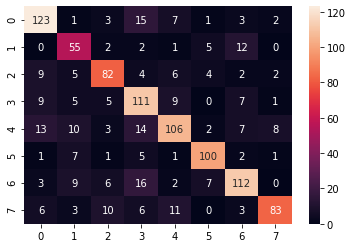

In [21]:
#Classification report, Confusion matrix and accuracy score is printed
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn

print(classification_report(y_test,y_pred))

acc = float(accuracy_score(y_test,y_pred))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [22]:
#Comparing training and test accuracy to check for overfitting of data
train_acc = float(svclassifier.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svclassifier.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

----train accuracy score 79.12401809093072 ----
----test accuracy score 73.45385347288297 ----


In [23]:
#5-fold Cross-validation of SVC classifier
from sklearn.model_selection import cross_val_score

# no. of folds cv = 5
cv_results = cross_val_score(svclassifier, x, y, cv = 5)
print(cv_results)
print("Avg accuracy:",cv_results.mean()*100)

[0.76784015 0.73644148 0.7447619  0.71047619 0.73619048]
Avg accuracy: 73.91420415930406


In [24]:
#Normalize the training data and afterwards scaling the test data with the mean and standard deviation of the test data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC


#splitting dataset into train/ test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('SVM', SVC())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set: svc_scaled
svc_scaled = pipeline.fit(x_train, y_train)

# Instantiate and fit a classifier to the unscaled data
svc_unscaled = SVC(kernel = 'linear').fit(x_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(svc_scaled.score(x_test, y_test)))
print('Accuracy without Scaling: {}'.format(svc_unscaled.score(x_test, y_test)))

Accuracy with Scaling: 0.8239771646051379
Accuracy without Scaling: 0.7259752616555661


In [38]:
#check for overfitiing or underfitting 
train_acc = float(svc_scaled.score(x_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svc_scaled.score(x_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

----train accuracy score 86.64504716981132 ----
----test accuracy score 83.25471698113208 ----


In [32]:
scaled_predictions = svc_scaled.predict(X_test)

              precision    recall  f1-score   support

       angry       0.12      0.11      0.11       123
        calm       0.07      0.14      0.09        43
     disgust       0.12      0.14      0.13       112
     fearful       0.09      0.07      0.08       115
       happy       0.11      0.09      0.10       115
     neutral       0.07      0.06      0.06       108
         sad       0.10      0.11      0.11       108
   surprised       0.12      0.12      0.12       124

    accuracy                           0.10       848
   macro avg       0.10      0.10      0.10       848
weighted avg       0.10      0.10      0.10       848

----accuracy score 10.141509433962264 ----


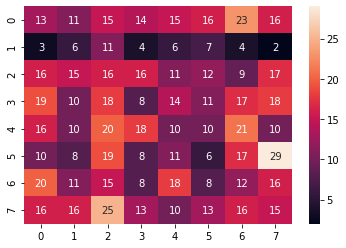

In [33]:
#Classification reports and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn

print(classification_report(y_test,scaled_predictions))

acc = float(accuracy_score(y_test,scaled_predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,scaled_predictions)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [35]:
#Cross validation score
from sklearn.model_selection import cross_val_score

# no. of folds cv = 5
cv_results = cross_val_score(svc_scaled, x, y, cv = 5)
print(cv_results)
print("Avg accuracy:",cv_results.mean()*100)

[0.83704572 0.84507042 0.83431953 0.8035503  0.83313609]
Avg accuracy: 83.06244121359467


In [45]:
joblib.dump(svclassifier, 'svm_model.pkl') 
print("MODEL SAVED")

MODEL SAVED
